In [8]:
cd '/home/pablo/probability-sorting'

/home/pablo/probability-sorting


/home/pablo/probability-sorting/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [285]:
from onsort.discrete_prob import pnb, P, hyp, all_dist,dist
from onsort.discrete_plots import plot_p_dist, P_print
from sympy import Sum, Symbol, plot, solve, Float, Function, lambdify,floor, maximum, Piecewise
from matplotlib import pyplot as plt
import numpy as np
from sympy.abc import i, k, m, n, x
from sympy import Lambda, Interval , Expr , Rational, Integral, S, solveset, integrate, plot, summation
from sympy.stats import Binomial, density
from functools import lru_cache
from math import comb

In [21]:
buckets = 2
items = 3

In [303]:
n1 = Symbol("n1", positive=True)

@lru_cache
def dist(buckets: int, b:int, n: int) -> list[Expr]:
    """ buckets """ 
    return binomial(buckets - 1, b, n) * P(buckets - 1 - b) * P(b)

@staticmethod
def binomial(buckets: int, b: int, n) -> Expr: 
    return density(Binomial("X", buckets, n))(b)

def opt_o(buckets, b):
    # ok but not the best
    buckets -=1

    if b == 0:
        return solveset(binomial(buckets, 0, n1) > binomial(buckets,1, n1), domain=Interval(0, 1)) 
    else:
        i1 = (binomial(buckets, b-1, n1) > binomial(buckets,b, n1)) 
        i2 = (binomial(buckets, b, n1) > binomial(buckets, b+1, n1))
        return Interval(solveset(i1, domain=Interval(0, 1)).end, solveset(i2, domain=Interval(0, 1)).end)
    
@lru_cache
def opt(buckets: int, b:int) -> Interval:
    """ Optimal threshold of n buckets we get it by placing on b and check with buckets-1"""
    # print("opt", buckets, b)
    if b == 0:
        return solveset(dist(buckets, 0, n1) > dist(buckets,1, n1), domain=Interval(0, 1)) 
    if b==buckets-1:
        return solveset(dist(buckets, buckets-2, n1) < dist(buckets, buckets-1, n1), domain=Interval(0, 1)) 
    else:
        i1 = (dist(buckets, b-1, n1) > dist(buckets, b, n1)) 
        i2 = (dist(buckets, b, n1) > dist(buckets, b+1, n1))
        return Interval(solveset(i1, domain=Interval(0, 1)).end, solveset(i2, domain=Interval(0, 1)).end)
    
@lru_cache
def P(buckets: int = 1) -> float | Rational:
    # print("AQUI", buckets)
    # if n> 9  better using rational = False, otherwise it takes ages
    # as the integrals are symbolic and makes gdc of very large fractions
    # further optimization can be achieved by using symmetry, as the integral
    # evaluate symetrically in the array, same for thresholds
    
    if buckets < 2 :
        return S(1)
    else:
        return sum(Integral(dist(buckets, b, n1), (n1, opt(buckets, b))) for b in range(buckets))
    # b = Symbol("b", integer=True, positive=True)
    # return Piecewise((1, buckets < 2), 
    #                 (summation(Integral(dist(buckets, b, n1), (n1, opt(buckets, b))), (b,0,buckets)), buckets>=2))
    

In [305]:
P(3)

In [275]:
P(2)

Integral(n1, (n1, 1/2, 1)) + Integral(1 - n1, (n1, 0, 1/2))

In [250]:
buckets = Symbol('buckets', integer= True, positive= True)

In [251]:
P(buckets)

TypeError: cannot determine truth value of Relational

In [239]:
P(2)

Integral(n1, (n1, 1/2, 1)) + Integral(1 - n1, (n1, 0, 1/2))

In [216]:
P(3)

Integral(2*n1*(1 - n1), (n1, 1/3, 2/3)) + Integral(n1**2*(Integral(n1, (n1, 1/2, 1)) + Integral(1 - n1, (n1, 0, 1/2))), (n1, 2/3, 1)) + Integral((1 - n1)**2*(Integral(n1, (n1, 1/2, 1)) + Integral(1 - n1, (n1, 0, 1/2))), (n1, 0, 1/3))

In [172]:
P(3).doit()

83/162

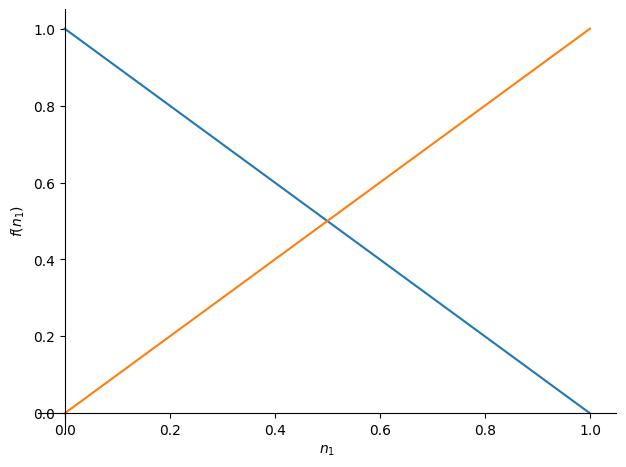

In [140]:
plot(*[binomial(2, 0,n1), binomial(2, 1,n1)], (n1,0,1))

In [141]:
opt(buckets, 2)

AttributeError: 'EmptySet' object has no attribute 'end'

In [110]:
P(2)

Integral(n1, (n1, 1/3, 2/3)) + Integral(1 - n1, (n1, 0, 1/3))

In [89]:
P(3)

Integral(n1**2*(Integral(n1, (n1, 1/3, 2/3)) + Integral(1 - n1, (n1, 0, 1/3))), (n1, 1/2, 3/4)) + Integral((1 - n1)**2*(Integral(n1, (n1, 1/3, 2/3)) + Integral(1 - n1, (n1, 0, 1/3))), (n1, 0, 1/4)) + Integral(2*n1*(1 - n1), (n1, 1/4, 1/2))

In [94]:
buckets= 2

In [99]:
integrate(dist(buckets, 0, n1), (n1, opt(buckets, 0)))

5/18

In [92]:
P(3)

ValueError: 'n' must be nonnegative integer. n = -1.

In [70]:
buckets= 3

In [211]:
b = 1
n1 = Symbol("n1", positive=True, real= True)
s = solve(binomial(buckets, b, n1) > binomial(buckets, b+1, n1))
if b == 0:
    upper_bound = s.rhs
    inter = Interval(0, upper_bound)
else:
    inter = Interval(0, upper_bound)
print(inter)
s

Interval(0, 1/4)


(1 < n1) | (n1 < 1/2)

In [194]:
simplify(s & (n1<=1))

n1 < 1/2

In [212]:
bin =  binomial(buckets, b, n1)
solve(simplify((binomial(buckets, b-1, n1) < bin) & (bin > binomial(buckets, b+1, n1))))

AttributeError: 'And' object has no attribute 'as_real_imag'

In [219]:
simplify(solve(binomial(buckets, b-1, n1) < bin) & solve(bin > binomial(buckets, b+1, n1)) & (n1<=1) & (n1>=0)) 

(n1 > 1/4) & (n1 < 1/2) & Ne(n1, 1)

In [233]:
simplify((n1<=1) & solve(binomial(buckets, b-1, n1) < bin) )

(n1 > 1/4) & (n1 < 1)

In [239]:
(binomial(buckets, b-1, n1) < bin) & (bin > binomial(buckets, b+1, n1)) & (n1<=1) & (n1>=0)

(n1 <= 1) & ((1 - n1)**3 < 3*n1*(1 - n1)**2) & (3*n1*(1 - n1)**2 > 3*n1**2*(1 - n1))

In [242]:
solveset((binomial(buckets, b-1, n1) < bin) , n1, domain=S.Reals)

Union(Interval.open(1/4, 1), Interval.open(1, oo))

In [235]:
from sympy import symbols, solveset, S, Interval

In [168]:
Integral(binomial(buckets, 0, n1) ,  (n1, s ))

Integral((1 - n1)**3, (n1, (1 < n1) | (n1 < 1/2)))

In [166]:
s & (n1>0)

(1 < n1) | (n1 < 1/2)

In [116]:
s2 = solve(binomial(buckets, 1, n1) > binomial(buckets, 2, n1))

In [121]:
simplify(s2) #  & (n1>1))

(n1 > 1) | (n1 < 1/2)

In [48]:
P(3)

TypeError: P() missing 1 required positional argument: 'items'

In [46]:
from math import comb
def binomial(buckets: int, k: int, n: float) -> Expr: 
    # n successes over k trials
    # faster that using sympy Binomial
    # n1 is prob of success tha is integrated latter
    return comb(buckets, k) * (1 - n) ** (buckets - k) * n ** (k)

In [47]:
S(buckets - 1)

buckets - 1

In [45]:
buckets = Symbol('buckets', integer = True, positive= True)
b = Symbol('b', integer = True, positive= True)
dist0 = binomial(buckets - 1, b, n1) 
dist1 = binomial(buckets - 1, b+1, n1)

TypeError: 'Add' object cannot be interpreted as an integer

In [31]:
type(b+1)

sympy.core.add.Add

In [21]:
n1 = Symbol("n1", domain=Interval(0, 1))
buckets = Symbol('buckets', integer = True, positive= True)
b = Symbol('b', integer = True, positive= True)
d = Symbol('d', integer = True, positive= True)
optm = Function('optm')
optx = Function('optx')
# f = Function('f')
# Sum(ʃ(binomial(buckets, b, n1), (n1, optm(b), optm(b+1))), (b, 0, buckets))
binom = Lambda((buckets, b, n1), binomial(buckets, b, n1).args[0][0])  # Example computation


my_integral = Integral( binomial(buckets, b, n1).args[0][0], (n1, optm(b), optm(b+1)))
Sum(my_integral, (b, 0, buckets))

Sum(Integral(n1**b*(1 - n1)**(-b + buckets)*binomial(buckets, b), (n1, optm(b), optm(b + 1))), (b, 0, buckets))

In [19]:
binomial(buckets, b, n1).args[0][0]

n1**b*(1 - n1)**(-b + buckets)*binomial(buckets, b)

Sum(Integral(n1**b*(1 - n1)**(-b + buckets)*binomial(buckets, b), (n1, optm(b), optm(b + 1))), (b, 0, buckets))

Integral(Piecewise((n1**b*(1 - n1)**(-b + buckets)*binomial(buckets, b), b <= buckets), (0, True)), (n1, optm(b), optm(b + 1)))

In [385]:
from sympy import symbols, Piecewise, Eq, solve
step_function = Piecewise((1, x > 0), (0, True))
step_function

Piecewise((1, x > 0), (0, True))

In [329]:
ʃ(binomial(c, 2, n1), (n1,0,1))

Piecewise((0, Eq(c, -1) | Eq(c, 0) | Eq(c, 1)), (2*binomial(c, 2)/(c**3 - c), (c >= 2) & (c < oo)), (0, True))

In [288]:
bu = Symbol('buckets')

In [289]:
P(2)

optm(0)**2/2 - optm(0) - optm(1)**2/2 - optx(0)**2/2 + optx(0) + optx(1)**2/2

Lambda(x, x**2)

In [30]:
P(3)

17/27

In [21]:
buckets = 3
[binomial(buckets - 1, b) for b in range(buckets)]

[(1 - n1)**2, n1*(2 - 2*n1), n1**2]

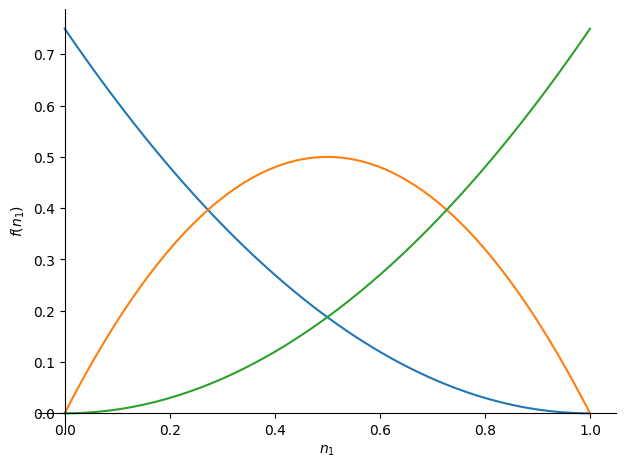

In [31]:
# plot(*[binomial(buckets - 1, b) for b in range(buckets)], (n1,0,1))
plot(*p_distributions(buckets), (n1,0,1))

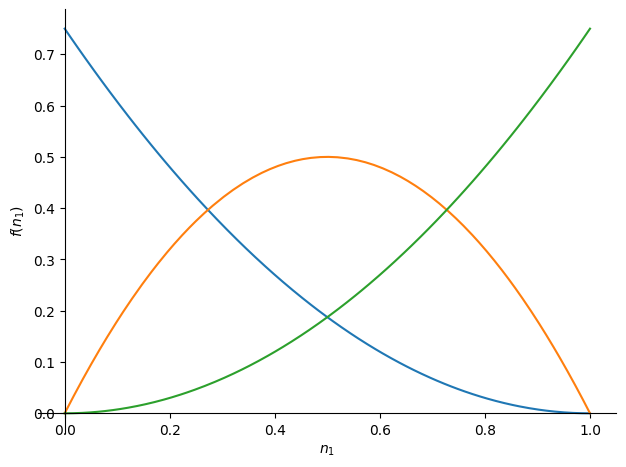

In [134]:
n1 = Symbol("n1", domain=Interval(0, 1))
plot(*dist, (n1,0,1))

In [ ]:
# 

# [_][_][X][_][_][_]